#    Verifiable Credentials Data Model 1.0


In [2]:
import asyncio
import json
import pprint

from indy import wallet, did
from indy.error import IndyError, ErrorCode

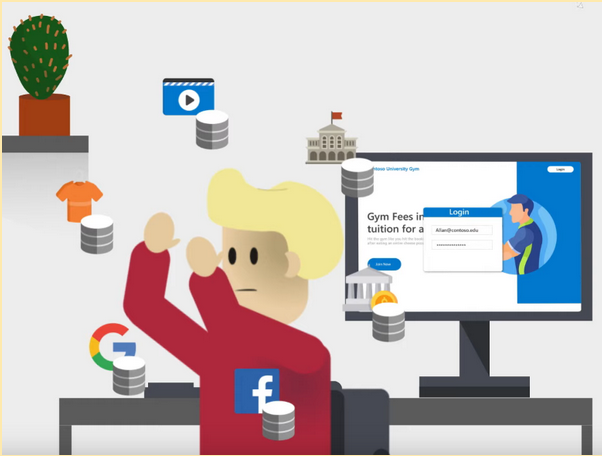

In [3]:
from IPython.display import Image
Image("img1.png")

fonte: https://youtu.be/r20hCF9NbTo

difícil controlar os dados associados a cada instituição

Uma verifiable credential é um pedaço de dados que um terceiro pode verificar e validar, o que ajuda no compartilhamento da credencial sem abrir mão da privacidade, utilizando um meio de verificação confiável.


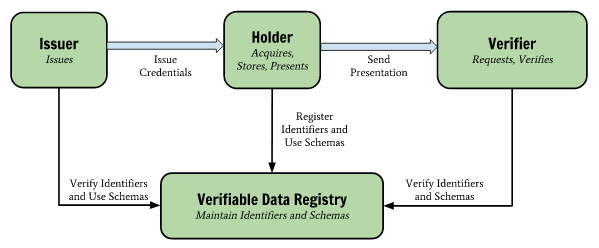

In [4]:
Image("img2.png")

fonte: https://www.w3.org/TR/vc-data-model/diagrams/ecosystem.svg

O emissor sendo um órgão de confiança vai fornecer um certificado digital, do qual a pessoa irá utilizar para provar e validar seus dados

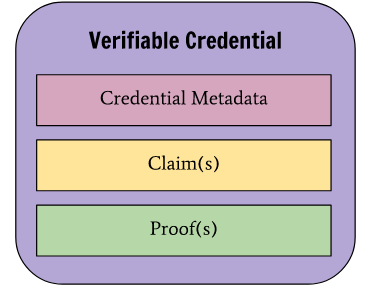

In [5]:
Image("img3.png")

fonte: https://www.w3.org/TR/vc-data-model/diagrams/credential.svg

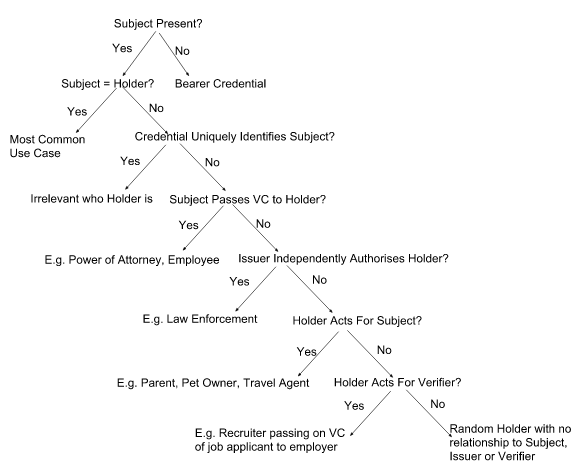

In [6]:
Image ("img4.png")

fonte: https://www.w3.org/TR/vc-data-model/diagrams/subject-ne-holder.svg

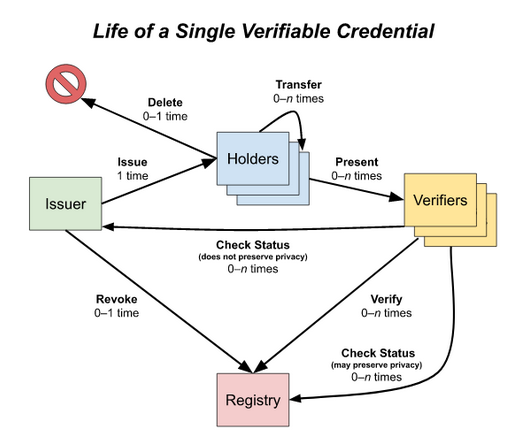

In [11]:
Image("img5.png")

fonte:https://www.w3.org/TR/vc-data-model/diagrams/ecosystemdetail.svg


Um emissor emite uma credencial verificável para um titular. A emissão sempre ocorre antes de qualquer outra ação envolvendo uma credencial.

Um titular pode transferir uma ou mais de suas credenciais verificáveis ​​para outra entidade, um holder.


Um holder apresenta uma ou mais de suas credenciais verificáveis ​​a um verificador, opcionalmente dentro de uma apresentação verificável.

Um verificador verifica a autenticidade da apresentação verificável apresentada (um certificado previamente validado) e credenciais verificáveis (uma DID que terá que ser verificada). Isso deve incluir a verificação do status da credencial, ver se esta tudo certo,  e assim revogar ou não as credenciais verificáveis.


Um emissor pode revogar uma credencial verificável.
    Um titular pode excluir e revogar uma credencial verificável.


### O modelo de dados pode ser codificado em JSON:


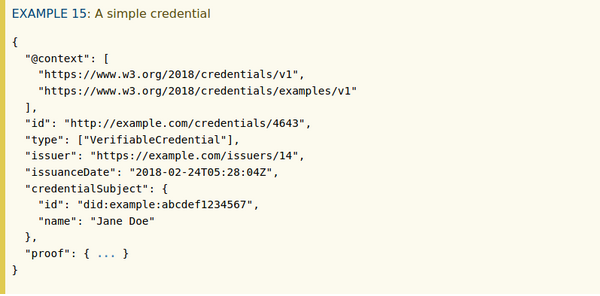

In [19]:
Image ("img6.png")

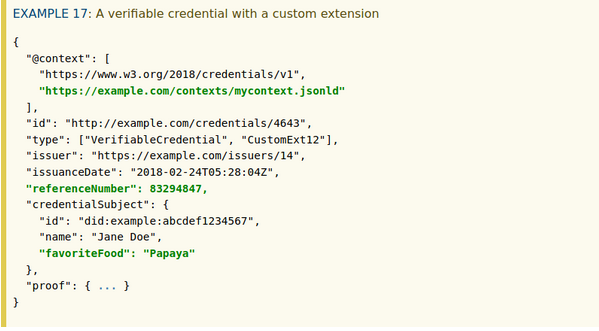

In [20]:
Image("img7.png")

Estes exemplos demonstram uma extensão do modelo de dados de credenciais verificáveis ​​de uma forma descentralizada.


Um subconjunto de assinaturas digitais, são necessários para garantir a proteção de uma credencial verificável. Ter e validar provas, por exemplo, usar a assinatura JSON Web de um JSON Web Token (JWT) para revisar um portador de chave.


Passando pelos passos:


Credential Subject -> Issuer -> Issuance Date -> Proofs (Signatures) -> Expiration -> Status -> Fitness For purpose


(mais sobre cada passo na url: https://www.w3.org/TR/vc-data-model/#validation)

# Decentralized Identifiers (DIDs) v1.0

## Caso de USO:


1. Alice tem 3 DIDs, um para fazer compras no ebay, outro para usar em redes sociais e um terceiro para interagir com o banco.

dividir em partes: <br/>
* Alice tem 3 DIDs
    * dados: forma de armazenamento e segurança


* compras no ebay
    * dados: comprovação de registro no site e da forma de pagamento

* redes sociais
    * dados: nome, idade, email, gerar e armazenar certificado de acesso

* interagir com o banco
    * dados: comprovação de existência, gerar e armazenar certificado de acesso 

Para o caso “a” que seria Alice ter 3 DIDs(que podem ser DIDs subject, DIDs document e uma DID URL) primeiramente ela teria que ter um meio para armazenar tais DIDs, uma DID controller, que poderiam ser por meio de uma carteira virtual assim como as wallets de cripto moedas e, assim, utilizar suas DIDs.


para o caso “b” teria que ter um certificado gerado por um banco confiável, assim, podendo gerar uma DID focada em dados monetários que confiança tanto para o comprador quanto para o vendedor.

para o caso “c” a DID de acesso as redes poderiam ser mais simples e geradas por um órgão federal, pois, por conter dados como idade, nome e email, poderia ser conteúdo previamente registrado em tal órgão, e após o cadastro em tal rede, poderia ser gerado uma DID da rede social, tal como um QR code para o acesso.


para o caso “d” após ter o cadastro no banco usando sua DID que comprova sua forma de pessoa, física ou jurídica, poderia se gerar uma DID própria do banco para controlar o acesso e o uso.


## Fontes:

* https://www.w3.org/TR/vc-data-model/ 
* https://www.w3.org/TR/did-core/  
* https://youtu.be/r20hCF9NbTo  
* JSON Web Token (JWT) https://tools.ietf.org/html/rfc7519  


In [7]:
from random import randint
# vou colocar um modelo em json

DIDsBank = {}

def generation(name):
    name = name
    did = randint(10000000,99999999)
    DIDsBank[name] = did
    print(f"{name}, sua DID gerada foi {did}.")
    return did

def verification(did):
    for i in DIDsBank.values():
        if did == i:
            print("DID verificada e autenticada.")
        else:
            print("DID não encontrada.")

nome = input("Nome:")
            
myDID = generation(nome)

print(myDID)

verification(myDID)


Nome:a
a, sua DID gerada foi 20941554.
20941554
DID verificada e autenticada.


In [41]:

wallet_config = json.dumps({"id": "wallet"})
wallet_credentials = json.dumps({"key": "wallet_key"})

def print_log(value_color="", value_noncolor=""):
    """set the colors for text."""
    HEADER = '\033[92m'
    ENDC = '\033[0m'
    print(HEADER + value_color + ENDC + str(value_noncolor))
    
async def write_nym_and_query_verkey():
    try:
        # 3.
        print_log('\n3. Creating new secure wallet\n')
        try:
            await wallet.create_wallet(wallet_config, wallet_credentials)
        except IndyError as ex:
            if ex.error_code == ErrorCode.WalletAlreadyExistsError:
                pass

        # 4.
        print_log('\n4. Open wallet and get handle from libindy\n')
        wallet_handle = await wallet.open_wallet(wallet_config, wallet_credentials)

        # 5.
        print_log('\n5. Generating and storing steward DID and verkey\n')
        steward_seed = '000000000000000000000000Steward1'
        did_json = json.dumps({'seed': steward_seed})
        steward_did, steward_verkey = await did.create_and_store_my_did(wallet_handle, did_json)
        print_log('Steward DID: ', steward_did)
        print_log('Steward Verkey: ', steward_verkey)

        # 6.
        print_log('\n6. Generating and storing trust anchor DID and verkey\n')
        trust_anchor_did, trust_anchor_verkey = await did.create_and_store_my_did(wallet_handle, "{}")
        print_log('Trust anchor DID: ', trust_anchor_did)
        print_log('Trust anchor Verkey: ', trust_anchor_verkey)
        
        #9
        print_log('\n9. Generating and storing DID and verkey representing a Client '
                  'that wants to obtain Trust Anchor Verkey\n')
        client_did, client_verkey = await did.create_and_store_my_did(wallet_handle, "{}")
        print_log('Client DID: ', client_did)
        print_log('Client Verkey: ', client_verkey)
        
        print_log('\n13. Closing wallet\n')
        await wallet.close_wallet(wallet_handle)
        #await pool.close_pool_ledger(pool_handle)

        # 14.
        print_log('\n14. Deleting created wallet\n')
        await wallet.delete_wallet(wallet_config, wallet_credentials)

    except IndyError as e:
        print('Error occurred: %s' % e)


#async def main():
#    loop = asyncio.get_running_loop()
#    loop.run_until_complete(write_nym_and_query_verkey())
#    loop.close()

#if __name__ == '__main__':
#    asyncio.run(main())
#    main()

asyncio.run_until_complete(write_nym_and_query_verkey())


AttributeError: module 'asyncio' has no attribute 'run_until_complete'